## Multivariate T Distribution
This notebook examines the implementation of mutlivariate t distrubtion in R & python.

Structure:

    1: Implementation using the R-wrapper (rpy2)
    
    2: Implementation in python (statsmodel)
    
    3: Test the computation time of both

In [1]:
# import packages
import numpy as np
import pandas as pd

from scipy import stats
from math import gamma


import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

## Multivariate T distribution using rpy2

RPy2 creates a framework that can translate Python objects into R objects, pass them into R functions, and convert R output back into Python objects.
There are two ways to do this:
- Call R library functions as you would native Python functions
- Blocking R code into a Function

In [2]:
import rpy2 as rpy
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
# MASS = rpy.robjects.packages.importr('MASS')
mvtnorm = importr('mvtnorm')
r = robjects.r

#### Bivariate T distribution

The t distribution has the following properties:

- The mean of the distribution is equal to 0 .
- The variance is equal to v / ( v - 2 ), where v is the degrees of freedom (see last section) and v > 2.
- The variance is always greater than 1, although it is close to 1 when there are many degrees of freedom. With infinite degrees of freedom, the t distribution is the same as the standard normal distribution.

In [135]:
# specify sigma and df
sigma = r.matrix(r.c(1, 0.75, 0.75, 1), nrow=2)
df = 10

t_dist = np.matrix(mvtnorm.rmvt(n=1000, sigma=sigma, df=df))

# check column statistics
bi_rstats = stats.describe(t_dist)
print("Statistics: ", bi_rstats)
np.std(t_dist[:,0]) , np.std(t_dist[:,1]) 

Statistics:  DescribeResult(nobs=1000, minmax=(array([-4.67430456, -4.02039782]), array([4.38770407, 4.33069478])), mean=array([-0.04028754, -0.04540926]), variance=array([1.24752645, 1.1791536 ]), skewness=array([-0.0561851 , -0.07111994]), kurtosis=array([0.81187674, 0.91198138]))


(1.116368631253572, 1.0853453104376798)

In [173]:
## get density function
# z = np.array(mvtnorm.dmvt(x = mvtnorm.rmvt(n=1000, sigma=sigma, df=df))).reshape(1000,-1)
# min(z), max(z)

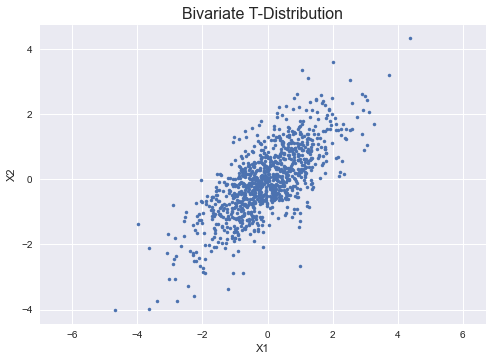

In [138]:
plt.plot(t_dist[:,0], t_dist[:,1], '.')
plt.axis('equal')
plt.title('Bivariate T-Distribution', size=16)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

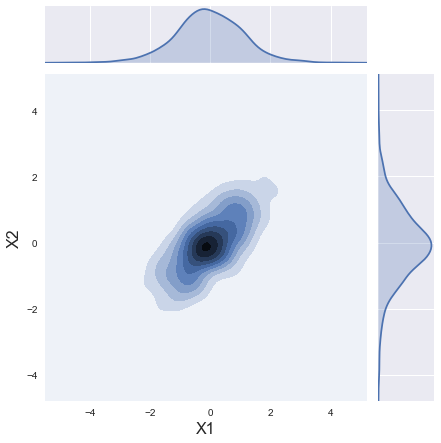

In [139]:
h = sns.jointplot(t_dist[:, 0], t_dist[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16)

In [140]:
# sns.pairplot(pd.DataFrame(t_dist), diag_kind = 'kde')

3D distribution

In [141]:
# specify sigma and df
sigma = r.matrix(r.c(1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1), nrow=3)
df = 10
t_dist = np.matrix(mvtnorm.rmvt(n=1000, sigma=sigma, df=df))

In [142]:
# check column statistics
rstats_3d = stats.describe(t_dist)
print("Statistics: ", rstats_3d)

Statistics:  DescribeResult(nobs=1000, minmax=(array([-6.63594373, -7.02430714, -4.40873094]), array([4.47206251, 3.97833271, 4.30010761])), mean=array([ 0.00070375, -0.00133641,  0.02506658]), variance=array([1.29433022, 1.35985977, 1.24913323]), skewness=array([-0.18669793, -0.08353739, -0.01154493]), kurtosis=array([1.60007969, 2.23650926, 0.97707681]))


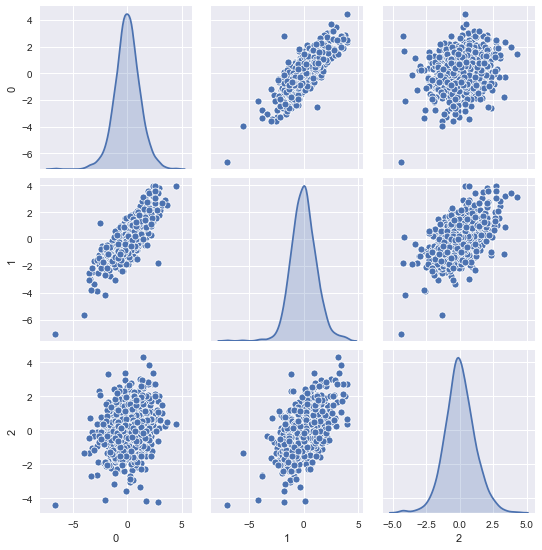

In [143]:
sns.pairplot(pd.DataFrame(t_dist), diag_kind = 'kde')

## Multivariate T distribution in Python

In [4]:
from statsmodels.sandbox.distributions import multivariate as mv

In [185]:
mu = [0,0]
sigma = np.array([[1, 0.75], [0.75, 1]])
df = 10
rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=1000)

# column statistics
bi_pystats = stats.describe(rvst)
# print("Statistics", bi_pystats)

# R result
# Statistics:  DescribeResult(nobs=1000, minmax=(array([-5.07593233, -5.59511382]), array([3.85595153, 3.44888734])), mean=array([-0.06719994, -0.06622473]), variance=array([1.22981079, 1.240606  ]), skewness=array([-0.05498701, -0.3175301 ]), kurtosis=array([0.84696571, 1.17426817]))
# print(rvst)

In [186]:
# Python results
bi_pystats

DescribeResult(nobs=1000, minmax=(array([-3.35118846, -5.2328459 ]), array([4.77709641, 4.82887249])), mean=array([-0.01599033, -0.03607218]), variance=array([1.18593294, 1.21086842]), skewness=array([0.15332061, 0.00888072]), kurtosis=array([0.74166179, 1.31156427]))

In [147]:
# R results
bi_rstats

DescribeResult(nobs=1000, minmax=(array([-4.67430456, -4.02039782]), array([4.38770407, 4.33069478])), mean=array([-0.04028754, -0.04540926]), variance=array([1.24752645, 1.1791536 ]), skewness=array([-0.0561851 , -0.07111994]), kurtosis=array([0.81187674, 0.91198138]))

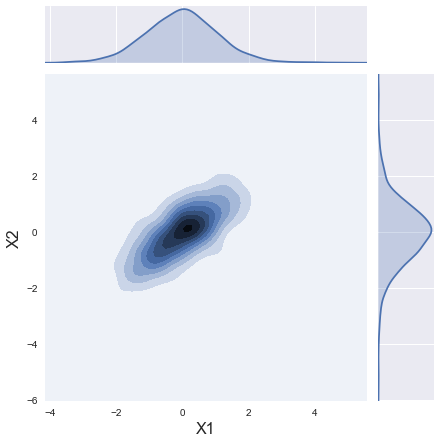

In [187]:
h = sns.jointplot(rvst[:, 0], rvst[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16)

In [149]:
# sns.pairplot(pd.DataFrame(rvst), diag_kind = 'kde')

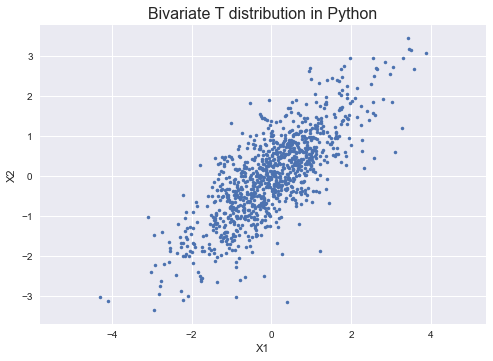

In [150]:
plt.plot(rvst[:,0], rvst[:,1], '.')
plt.title('Bivariate T distribution in Python', size=16)
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

Check the multivariate t distribution across different correlation values

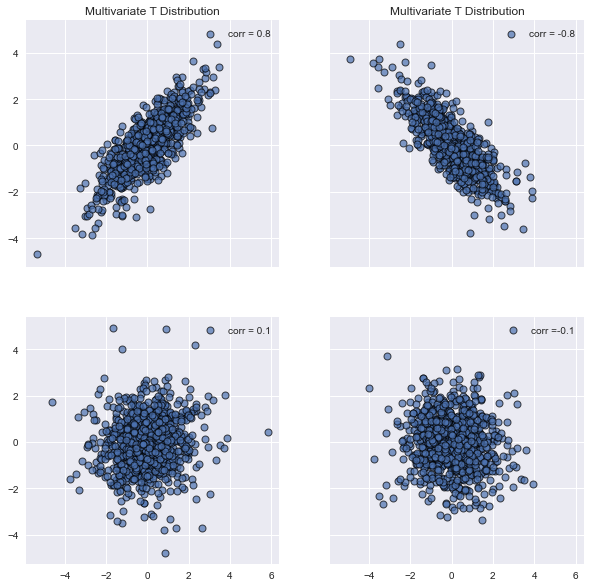

In [174]:
df = 10
rvst1 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, 0.8], [0.8, 1]]), df=df, n=1000)
rvst2 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, 0.1], [0.1, 1]]), df=df, n=1000)
rvst3 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, -0.8], [-0.8, 1]]), df=df, n=1000)
rvst4 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, -0.1], [-0.1, 1]]), df=df, n=1000)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey = True, figsize=(10,10))
# fig= fig.figure(figsize=(9,9))


# plot pdf
ax1[0].scatter(rvst1[:,0], rvst1[:,1], label = "corr = 0.8", 
               edgecolor='black', linewidth=1, alpha=0.7)
ax1[0].set_title('Multivariate T Distribution')
ax1[0].legend()

ax2[0].scatter(rvst2[:,0], rvst2[:,1], label =  "corr = 0.1",
              edgecolor='black', linewidth=1, alpha=0.7)
ax2[0].legend()


ax1[1].scatter(rvst3[:,0], rvst3[:,1], label =  "corr = -0.8",
              edgecolor='black', linewidth=1, alpha=0.7)
ax1[1].set_title('Multivariate T Distribution')
ax1[1].legend()


ax2[1].scatter(rvst4[:,0], rvst4[:,1], label =  "corr =-0.1",
              edgecolor='black', linewidth=1, alpha=0.7)
ax2[1].legend()

# plt.xlabel('X1')
# plt.ylabel('X2')

Check the multivariate t distribution across different correlation values and different degree of freedom

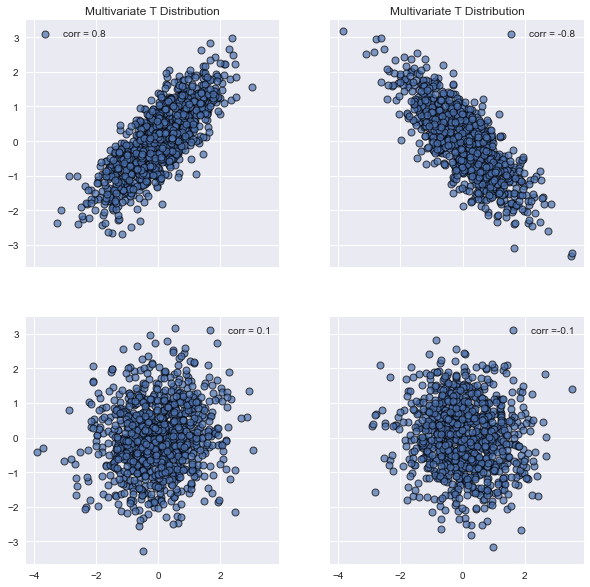

In [175]:
df = 1000
rvst1 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, 0.8], [0.8, 1]]), df=df, n=1000)
rvst2 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, 0.1], [0.1, 1]]), df=df, n=1000)
rvst3 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, -0.8], [-0.8, 1]]), df=df, n=1000)
rvst4 = mv.multivariate_t_rvs(m=[0,0], S=np.array([[1, -0.1], [-0.1, 1]]), df=df, n=1000)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey = True, figsize=(10,10))
# fig= fig.figure(figsize=(9,9))


# plot pdf
ax1[0].scatter(rvst1[:,0], rvst1[:,1], label = "corr = 0.8", 
               edgecolor='black', linewidth=1, alpha=0.7)
ax1[0].set_title('Multivariate T Distribution')
ax1[0].legend()

ax2[0].scatter(rvst2[:,0], rvst2[:,1], label =  "corr = 0.1",
              edgecolor='black', linewidth=1, alpha=0.7)
ax2[0].legend()


ax1[1].scatter(rvst3[:,0], rvst3[:,1], label =  "corr = -0.8",
              edgecolor='black', linewidth=1, alpha=0.7)
ax1[1].set_title('Multivariate T Distribution')
ax1[1].legend()


ax2[1].scatter(rvst4[:,0], rvst4[:,1], label =  "corr =-0.1",
              edgecolor='black', linewidth=1, alpha=0.7)
ax2[1].legend()

# plt.xlabel('X1')
# plt.ylabel('X2')

3 D distribution

In [153]:
mu = [0,0,0]
# 1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1
sigma = np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])
df = 10
rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=1000)

# column statistics
py_3d = stats.describe(rvst)
py_3d

DescribeResult(nobs=1000, minmax=(array([-3.78162897, -4.12940979, -4.76777936]), array([3.75319183, 3.98153609, 4.10304583])), mean=array([ 0.02076262, -0.01959961, -0.0350498 ]), variance=array([1.27163021, 1.22690063, 1.2462963 ]), skewness=array([ 0.04453997,  0.01339122, -0.05106408]), kurtosis=array([0.57960929, 0.56483943, 0.88166336]))

In [154]:
rstats_3d

DescribeResult(nobs=1000, minmax=(array([-6.63594373, -7.02430714, -4.40873094]), array([4.47206251, 3.97833271, 4.30010761])), mean=array([ 0.00070375, -0.00133641,  0.02506658]), variance=array([1.29433022, 1.35985977, 1.24913323]), skewness=array([-0.18669793, -0.08353739, -0.01154493]), kurtosis=array([1.60007969, 2.23650926, 0.97707681]))

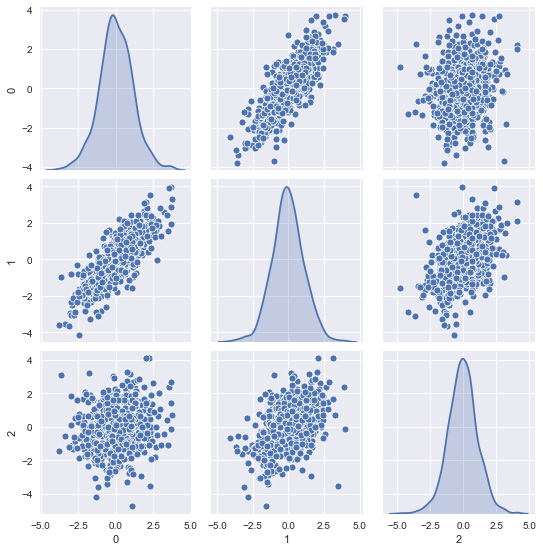

In [155]:
# Create the default pairplot
sns.pairplot(pd.DataFrame(rvst), diag_kind = 'kde')

## Execution Time Comparision

Compare for 1000 random variables generation

In [241]:
[[i for i in range(5)] for i in range(5)]


[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

In [244]:
np.ones((5, 5)) *0.9

array([[0.9, 0.9, 0.9, 0.9, 0.9],
       [0.9, 0.9, 0.9, 0.9, 0.9],
       [0.9, 0.9, 0.9, 0.9, 0.9],
       [0.9, 0.9, 0.9, 0.9, 0.9],
       [0.9, 0.9, 0.9, 0.9, 0.9]])

In [234]:
covar = pd.read_csv("My Documents/covariance_matrix.csv")
np.array(covar)

array([[0.9, 1. , 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. , 0.8],
       [0.8, 0.7, 1. , 0.5, 0.4, 0.3, 0.2, 0.1, 0. , 0.9, 0.7],
       [0.7, 0.6, 0.5, 1. , 0.4, 0.3, 0.2, 0.1, 0. , 0.8, 0.9],
       [0.6, 0.5, 0.4, 0.4, 1. , 0.7, 0.6, 0.5, 0.4, 0.3, 0.2],
       [0.5, 0.4, 0.3, 0.3, 0.7, 1. , 0.4, 0.3, 0.2, 0.1, 0. ],
       [0.4, 0.3, 0.2, 0.2, 0.6, 0.4, 1. , 0.3, 0.2, 0.1, 0.9],
       [0.3, 0.2, 0.1, 0.1, 0.5, 0.3, 0.3, 1. , 0.6, 0.5, 0.4],
       [0.2, 0.1, 0. , 0. , 0.4, 0.2, 0.2, 0.6, 1. , 0.8, 0.9],
       [0.1, 0. , 0.9, 0.8, 0.3, 0.1, 0.1, 0.5, 0.8, 1. , 0.8],
       [0. , 0.8, 0.7, 0.9, 0.2, 0. , 0.9, 0.4, 0.9, 0.8, 1. ]])

In [238]:
np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])

array([[1. , 0.8, 0.2],
       [0.8, 1. , 0.5],
       [0.2, 0.5, 1. ]])

In [11]:
mu = [0 for i in range(0,25)]
rvst = mv.multivariate_t_rvs(m=mu, S=np.ones((25, 25)) *0.9, df=df, n=num)

MemoryError: Unable to allocate 3.64 GiB for an array with shape (19531250, 25) and data type float64

In [266]:
(np.ones((9, 9)) *0.9).shape

(9, 9)

In [267]:
# r.matrix(r.rep(0.9, 9), nr = 9, nc = 9)

sigma = r.matrix(r.rep(0.9, 9), nr = 9, nc = 9)
df = 10
t_dist = np.matrix(mvtnorm.rmvt(n=num, sigma=sigma, df=df))

In [15]:
import time

num=10
r_time_list = []
py_time_list = []
size = 25
for x in range(10,100,10):
    start_time = time.time()
#     sigma = r.matrix(r.c(1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1), nrow=3)
#     df = 10
#     t_dist = np.matrix(mvtnorm.rmvt(n=num, sigma=sigma, df=df))

    sigma = r.matrix(r.rep(0.9, size), nr = size, nc = size)
    df = 10
    t_dist = np.matrix(mvtnorm.rmvt(n=num, sigma=sigma, df=df))
    
    
    print("--- %s milliseconds ---" % ((time.time() - start_time)*1000))
    r_time_list.append((time.time() - start_time))
    
    start_time = time.time()
#     mu = [0,0,0]
#     sigma = np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])
    df = 10
#     rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=num)
    
    mu = [0 for i in range(0,size)]
    sigma = np.ones((size, size)) *0.9
    print(sigma)
    rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=num)
    py_time_list.append((time.time() - start_time))

    num = num*5
    print(num)

--- 81.94899559020996 milliseconds ---
[[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.

31250
--- 194.88835334777832 milliseconds ---
[[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9

19531250


In [13]:
py_time_list

[0.07095909118652344,
 0.0,
 0.001997709274291992,
 0.002997159957885742,
 0.008994817733764648,
 0.043973445892333984,
 0.23586249351501465,
 1.1953113079071045,
 6.2833850383758545]

Text(0.5, 1.0, 'Execution Time across Iterations')

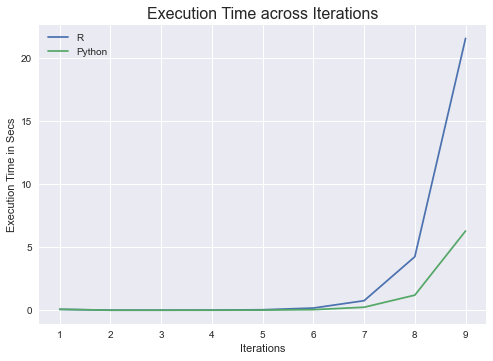

In [14]:
x = [ num for num in range(1,10)]

plt.plot(x, r_time_list, label = 'R')
plt.plot(x, py_time_list, label = 'Python')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Execution Time in Secs')
plt.title('Execution Time across Iterations', size=16)

In [156]:
%%timeit -n 1 -r 1 
sigma = r.matrix(r.c(1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1), nrow=3)
df = 10
t_dist = np.matrix(mvtnorm.rmvt(n=1000, sigma=sigma, df=df))

5.79 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [182]:
np.array([[1, 0.8, 0.2, 0.1], [0.8, 1,  0.1, 0.5],  [0.2,0.1, 1, 0.1], [0.1 ,0.5, 0.1, 1]])

array([[1. , 0.8, 0.2, 0.1],
       [0.8, 1. , 0.1, 0.5],
       [0.2, 0.1, 1. , 0.1],
       [0.1, 0.5, 0.1, 1. ]])

In [202]:
%%timeit -n 1 -r 1 
mu = [0,0,0]
sigma = np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])
df = 10
rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=1000)

23.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [158]:
%%timeit -n 10 -r 5 
sigma = r.matrix(r.c(1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1), nrow=3)
df = 10
t_dist = np.matrix(mvtnorm.rmvt(n=1000, sigma=sigma, df=df))

3.04 ms ± 531 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [184]:
%%timeit -n 10 -r 5 
mu = [0,0,0, 0]
# sigma = np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])
sigma = np.array([[1, 0.8, 0.2, 0.1], [0.8, 1,  0.1, 0.5],  [0.2,0.1, 1, 0.1], [0.1 ,0.5, 0.1, 1]])
df = 10
rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=1000)
##1000 μs (microsecs) = 1 ms

600 µs ± 160 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Compare for 10,000 random variables generation

In [160]:
%%timeit -n 10 -r 5 
sigma = r.matrix(r.c(1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1), nrow=3)
df = 10
t_dist = np.matrix(mvtnorm.rmvt(n=100000, sigma=sigma, df=df))

59.8 ms ± 7.71 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [161]:
%%timeit -n 10 -r 5 
mu = [0,0,0]
sigma = np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])
df = 10
rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=10000)

3.33 ms ± 281 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


Compare for 100,000 random variables generation

In [162]:
%%timeit -n 10 -r 5 
sigma = r.matrix(r.c(1, 0.8, 0.2, 0.8, 1, 0.5, 0.2, 0.5, 1), nrow=3)
df = 10
t_dist = np.matrix(mvtnorm.rmvt(n=1000000, sigma=sigma, df=df))

512 ms ± 22.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [163]:
%%timeit -n 10 -r 5 
mu = [0,0,0]
sigma = np.array([[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2,0.5, 1]])
df = 10
rvst = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=1000000)

235 ms ± 5.29 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


Probability density function

In [164]:
def multivariate_t_distribution(x, mu, Sigma, df):
    '''
    Multivariate t-student density. Returns the density
    of the function at points specified by x.

    input:
        x = parameter (n-d numpy array; will be forced to 2d)
        mu = mean (d dimensional numpy array)
        Sigma = scale matrix (dxd numpy array)
        df = degrees of freedom

    Edited from: http://stackoverflow.com/a/29804411/3521179
    '''

    x = np.atleast_2d(x) # requires x as 2d
    nD = Sigma.shape[0] # dimensionality
    numerator = gamma(1.0 * (nD + df) / 2.0)
#     print("numerator", numerator) 
    denominator = (
            gamma(1.0 * df / 2.0) * 
            np.power(df * np.pi, 1.0 * nD / 2.0) *  
            np.power(np.linalg.det(Sigma), 1.0 / 2.0) * 
            np.power(
                1.0 + (1.0 / df) *
                np.diagonal(
                    np.dot( np.dot(x - mu, np.linalg.inv(Sigma)), (x - mu).T)
                ), 
                1.0 * (nD + df) / 2.0
                )
            )
#     print(len(denominator))

    return 1.0 * numerator / denominator 


mu = [0,0]
sigma = np.array([[1, 0.95], [0.95, 1]])
rv = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=500)


pdf = multivariate_t_distribution(x = rv, mu = mu, Sigma = sigma, df=100)

In [165]:
min(pdf), max(pdf)

(1.0824268294532022e-05, 0.5095005148953364)

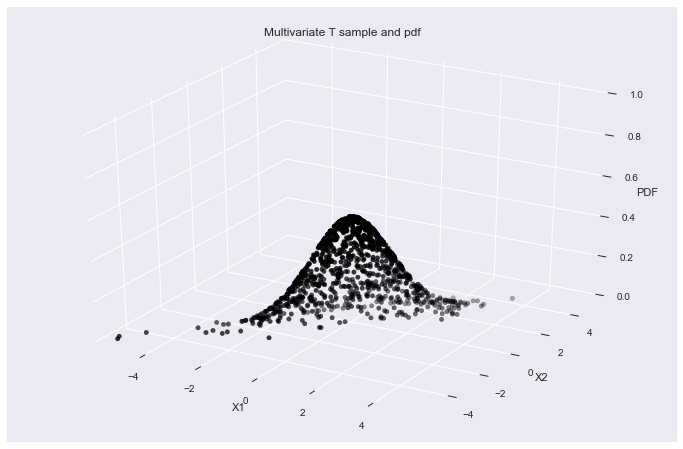

In [166]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal


# Sample parameters
mu = np.array([0, 0])
sigma = np.array([[1, 0.95], [0.95, 1]])
sample = mv.multivariate_t_rvs(m=mu, S=sigma, df=df, n=1000)
# sample = rv.rvs(500)

# Bounds parameters
x_abs = 5.5
y_abs = 5.5
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.02, -y_abs:y_abs:.02]

pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid

levels = np.linspace(0, 1, 40)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

# Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# # The heatmap
# ax.contourf(x_grid, y_grid, 0.1 * multivariate_t_distribution(x = sample, mu = mu, Sigma = sigma, df=10), 
#             zdir='z', levels=0.1 * levels, alpha=0.9)

# # The wireframe
# ax.plot_wireframe(x_grid, y_grid,
#                   multivariate_t_distribution(x = sample, mu = mu, Sigma = sigma, df=10), 
#                   rstride=10, cstride=10, color='k')

# The scatter. Note that the altitude is defined based on the pdf of the
# random variable
ax.scatter(sample[:, 0], sample[:, 1], 
           multivariate_t_distribution(x = sample, mu = mu, Sigma = sigma, df=10)
           , c='k')

# ax.legend()
ax.set_title("Multivariate T sample and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('PDF')



plt.show()

## Mutlivariate normal distribution

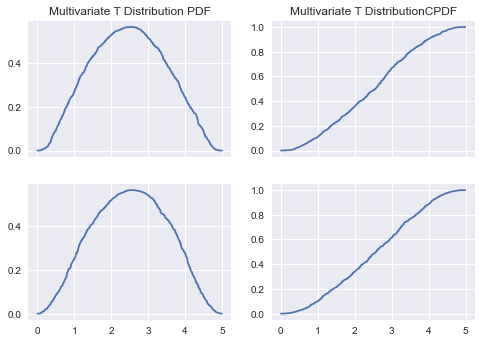

In [167]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x = np.linspace(0, 5, 1000, endpoint=False)

# PDF
pdf1 = multivariate_normal.pdf(sorted(rvst[:,0]), mean=0, cov=0.5)
pdf2 = multivariate_normal.pdf(sorted(rvst[:,1]), mean=0, cov=0.5)

# CDF
cdf1 = multivariate_normal.cdf(sorted(rvst[:,0]), mean=0, cov=0.5)
cdf2 = multivariate_normal.cdf(sorted(rvst[:,1]), mean=0, cov=0.5)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, sharex=True)

# plot pdf
ax1[0].plot(x, pdf1, label = "Random Variable 1")
ax1[0].set_title('Multivariate T Distribution PDF')

ax2[0].plot(x, pdf2, label = "Random Variable 2")

# plot cdf
ax1[1].plot(x, cdf1, label = "Random Variable 1")
ax1[1].set_title('Multivariate T DistributionCPDF')

ax2[1].plot(x, cdf2, label = "Random Variable 2")


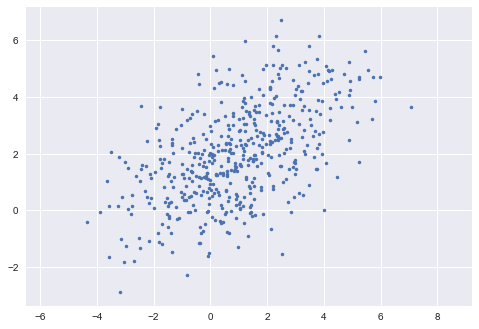

In [168]:
mean = [1, 2]
cov = [[4, 2], [2, 3]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 500).T

plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [169]:
# multi variate normal distribution
from scipy.stats import mvn
import numpy as np
low = np.array([-10, -10])
upp = np.array([.1, -.2])
mu = np.array([-.3, .17])
S = np.array([[1.2,.35],[.35,2.1]])
p,i = mvn.mvnun(low,upp,mu,S)
p

0.2881578675080012

In [170]:
import numpy as np
import scipy.stats
import math
from math import lgamma
from numpy import matrix
from numpy import linalg
from numpy.linalg import slogdet
import scipy.special
from scipy.special import gammaln

mu = np.array([3,3])
x = np.array([1, 1])
Sigma = np.array([[1, 0], [0, 1]])
p=2
df=1

def dmvt(x, mu, Sigma, df, log):
    '''
    Multivariate t-student density. Returns the density
    of the function at points specified by x.

    input:
        x = parameter (n x d numpy array)
        mu = mean (d dimensional numpy array)
        Sigma = scale matrix (d x d numpy array)
        df = degrees of freedom
        log = log scale or not

    '''
    p = Sigma.shape[0] # Dimensionality
    dec = np.linalg.cholesky(Sigma)
    R_x_m = np.linalg.solve(dec,np.matrix.transpose(x)-mu)
    rss = np.power(R_x_m,2).sum(axis=0)
    logretval = lgamma(1.0*(p + df)/2) - (lgamma(1.0*df/2) + np.sum(np.log(dec.diagonal())) \
       + p/2 * np.log(math.pi * df)) - 0.5 * (df + p) * math.log1p((rss/df) )
    if log == False:    
        return(np.exp(logretval))
    else:
         return(logretval)


print(dmvt(x,mu,Sigma,df,True))

-5.133713932413675


References:
1. https://github.com/statsmodels/statsmodels/blob/f196c0963f1e9c85fea1e6eec2a00841cdce8a65/statsmodels/sandbox/distributions/extras.py#L963
2. https://rdrr.io/rforge/mvtnorm/man/pmvnorm.html
3. https://stackoverflow.com/questions/31666270/python-analog-of-mvrnorms-empirical-setting-when-generating-a-multivariate-dist    
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
5. https://cran.r-project.org/web/packages/mvtnorm/mvtnorm.pdf

Student T dist: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
6. https://github.com/gwgundersen/multivariate-t-distribution
7. https://twiecki.io/blog/2018/05/03/copulas/
8. https://stattrek.com/probability-distributions/t-distribution.aspx
